In [19]:
import pandas as pd
import numpy as np
from datetime import datetime
from pathlib2 import Path
import matplotlib.pyplot as plt


from Database.DB import DB_object
from Database import *
from MachineLearning.Labeling import *

In [4]:
DB_DIR = Path('__file__').resolve().parent.joinpath('Database/stocks.db')
DB_instance = DB_object(str(DB_DIR))
conn = DB_instance.create_connection()
print(DB_instance)

Create Connection to SQL Lite
Create Connection to SQL Lite
running sqlite3 version :2.6.0, Connection to Database on: /Users/richard.wieland/Desktop/Projects/Finance_Platform/Database/stocks.db)


# Load Stock Frame

# Ploting

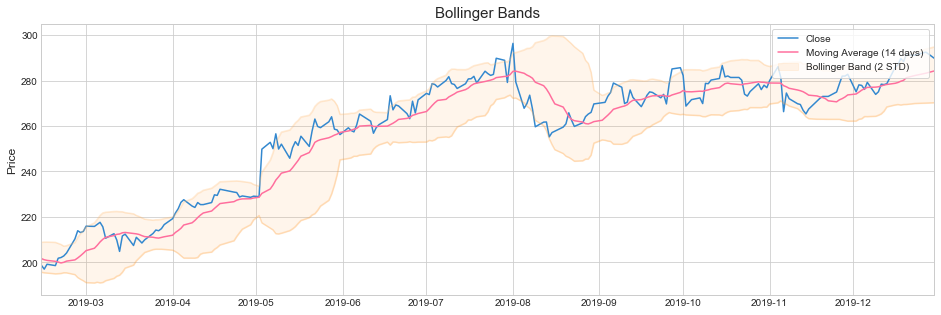

In [53]:
def bollinger_bands_plot(stock, std=2, path=None):    
    
    # Bollinger band plot with EMA and original historical data
    plt.figure(figsize=(16,5))
    plt.style.use('seaborn-whitegrid')
    plt.plot(stock.Trading_Date, stock.Close, color='#3388cf', label='Close')
    #plt.plot(stock.index, stock.MA21, color='#ad6eff', label='Moving Average (21 days)')
    plt.plot(stock.Trading_Date, stock.SMA_14, color='#ff6e9d', label='Moving Average (14 days)')
    plt.plot(stock.Trading_Date, stock.BOLLING_UPPER, color='#ffbd74', alpha=0.3)
    plt.plot(stock.Trading_Date, stock.BOLLING_LOWER, color='#ffa33f', alpha=0.3)
    plt.fill_between(stock.Trading_Date, stock.BOLLING_UPPER, stock.BOLLING_LOWER, color='#ffa33f', alpha=0.1, label='Bollinger Band ({} STD)'.format(std))
    plt.legend(frameon=True, loc=1, ncol=1, fontsize=10, borderpad=.6)
    plt.title('Bollinger Bands', fontSize=15)
    plt.ylabel('Price', fontSize=12)
    plt.xlim([stock.Trading_Date.min(), stock.Trading_Date.max()])
    if path != None:
        plt.savefig(path)
    else:
        plt.show()

stock_frame = DB.query(conn, 'Stock_Calc', YEAR=2019)      
stock_frame.Trading_Date = pd.to_datetime(stock_frame.Trading_Date, infer_datetime_format=True)
#stock_frame.set_index('Trading_Date', inplace=True, drop=True)  
bollinger_bands_plot(stock_frame.loc[stock_frame['Symbol']=='ADS.DE'])

In [44]:
#stock_frame.loc[stock_frame['Symbol']=='ADS.DE']